## Problem Statement

* You are working for a company that sells art sculptures from various artists around the world. Our task is to predict what is the cost of shipping these art sculptures based on various factors such as weight, height, width, location etc. Thus, this is a Dynamic Shipment Price Prediction problem based on various factors.

# Dynamic Shipment Price Prediction

**Life Cycle of a Machine Learning Project**

1. Understand Problem Statement
2. Data Collection
3. Data Cleaning
4. Exploratory Data Analysis
5. Data Pre-Processing
6. Model Training
7. Choose Best Model

In [1]:
# importing the required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### INITIAL DATA WHETTING:

In [2]:
# reading the data:

df = pd.read_csv('../data/train.csv')

In [3]:
# checking the first and last few rows of the dataset:

df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
df.tail()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.43
6496,fffe310036003400,Larry Edwards,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766",1347.02
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823",354.55
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006",5037.50
6499,fffe3700310031003600,Vernon Carroll,0.18,30.0,13.0,34729.0,Brass,46.63,78.25,No,Yes,No,Airways,No,Working Class,No,12/03/16,12/05/16,"New Christopher, AK 87406",722.47


In [5]:
# checking the shape of our data:

df.shape

(6500, 20)

In [6]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [7]:
# checking the datatypes of the variables:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [8]:
# checking the null values in each of the columns:

df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

### Initial Statistical Observations:

- There are 6500 rows and 20 columns in the dataset.
- Looking at the first and last few rows of the dataset, we can observe that it is a mix of numeric as well as categorical columns.
- The dataset has 6500 rows and 20 columns.
- There are some negative values for Shipping Cost, which cannot be true, this may have to be investigated further.
- Maximum Shipping cost is more than a Million Dollars.
- Average Shipping Cost id approx 17k Dollars.
- Median Shipping Cost is 382 dollars.
- For many variables, the mean is greater than median which indicates towards positively skewed data.
- The dataset has quite a few missing values.

### EXPLORING FURTHER and VISUALIZING THE DATA:

In [9]:
target_feature = 'Cost'

In [10]:
# separating the numeric and categorical features:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns:
print("We have {} numerical features, namely: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features, namely: {}".format(len(categorical_features), categorical_features))


We have 7 numerical features, namely: ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']
We have 13 categorical features, namely: ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


### UNIVARIATE ANALYSIS:

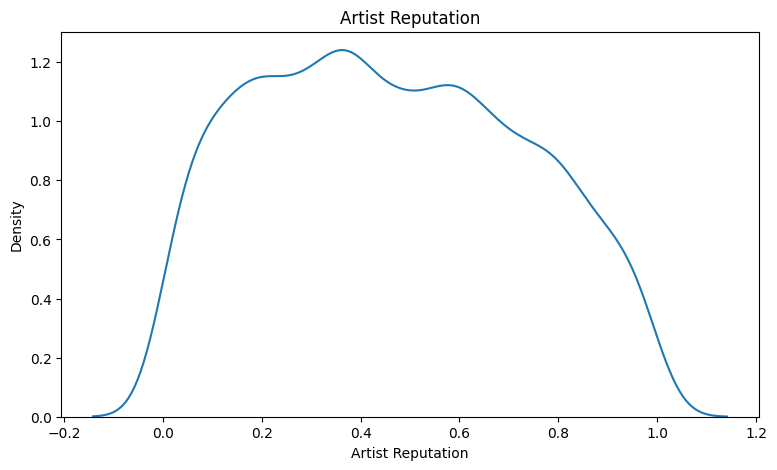

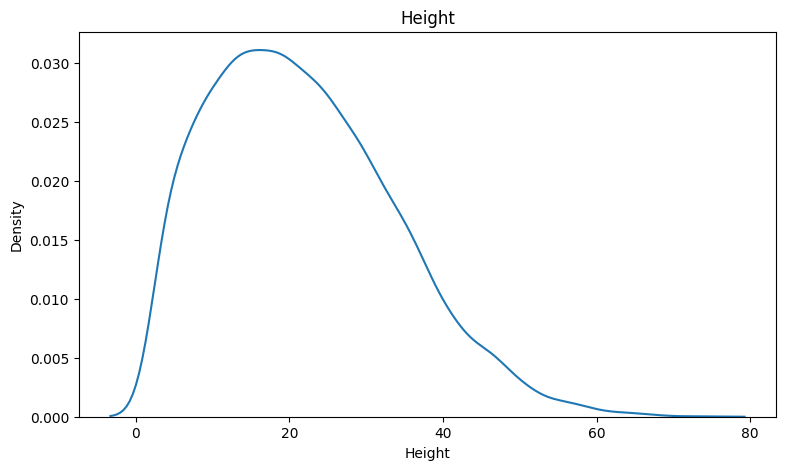

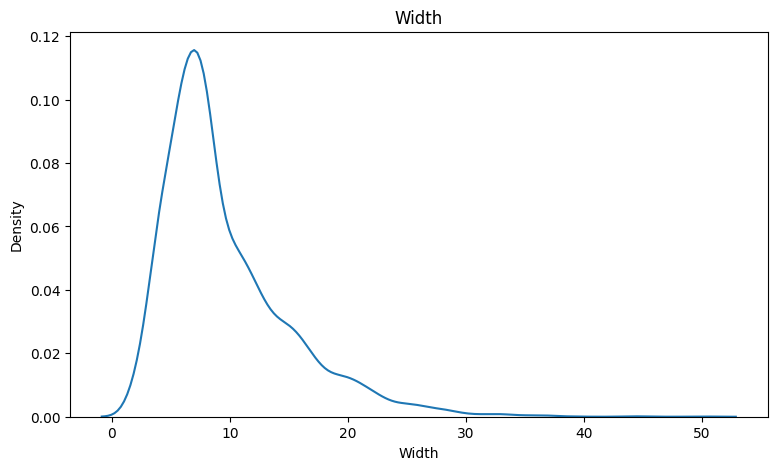

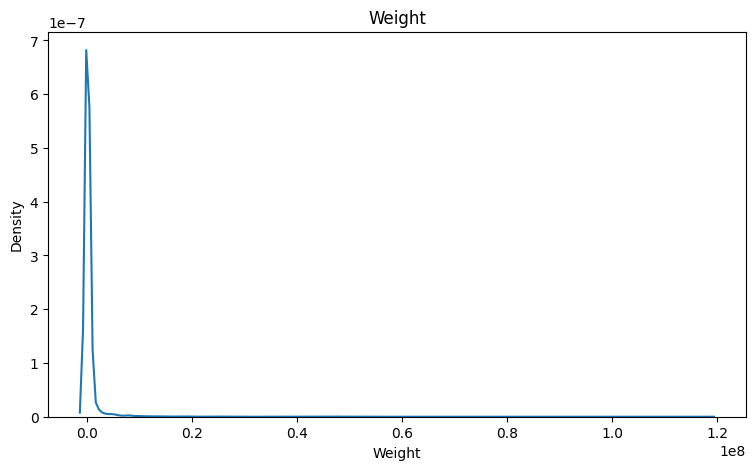

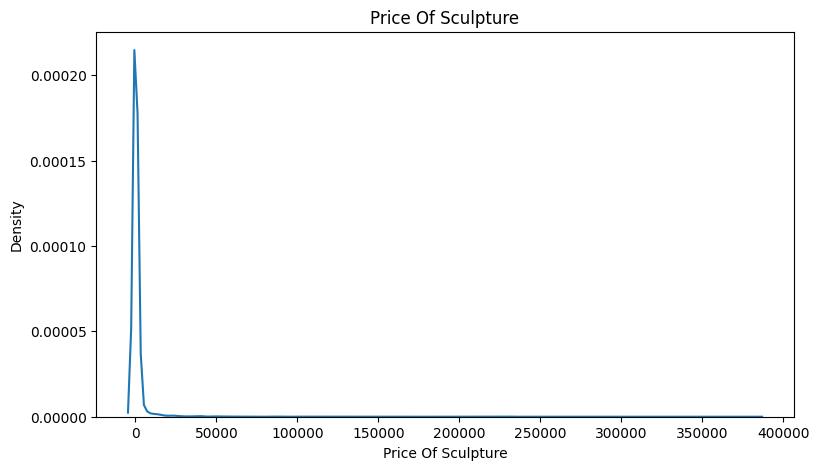

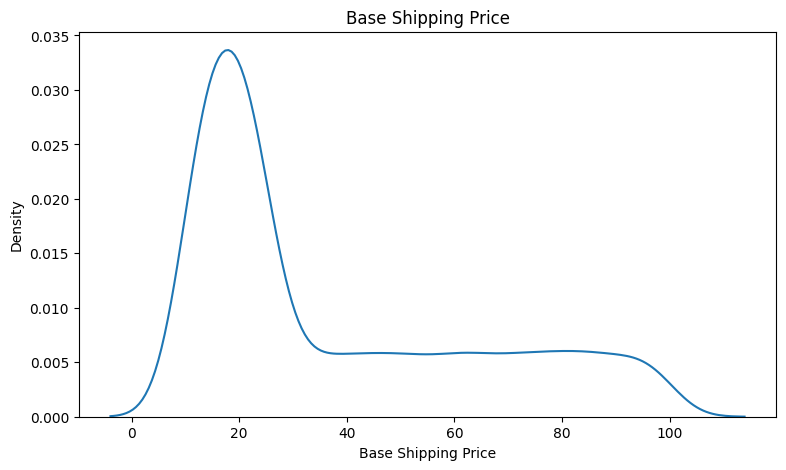

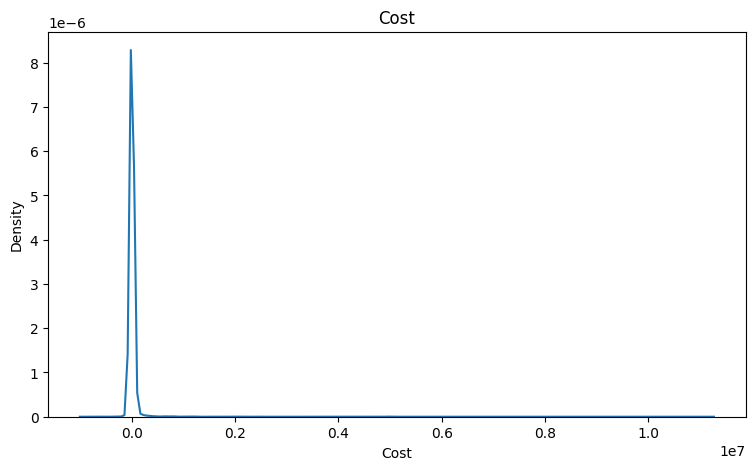

In [11]:
# Numeric Features:

for col in numeric_features:
    plt.figure(figsize=(9,5))
    sns.kdeplot(data = df, x = col)
    plt.title(col)
    plt.show()
    print()

### Observations:
- Almost all variables except Artist Reputation, are positively skewed.

In [12]:
# categorical Features
df.nunique()


Customer Id              6500
Artist Name              6449
Artist Reputation         101
Height                     65
Width                      40
Weight                   4410
Material                    7
Price Of Sculpture       3424
Base Shipping Price      3732
International               2
Express Shipment            2
Installation Included       2
Transport                   3
Fragile                     2
Customer Information        2
Remote Location             2
Scheduled Date           1660
Delivery Date            1664
Customer Location        6500
Cost                     6356
dtype: int64

In [13]:
# printing the data types of the variables:

df.dtypes

# Customer ID and Artist Name are not important also, customer location as these variables are unique for every value.
# dropping them for further univariate categorical analysis.

# Scheduled Date and Deleivery Date also need further processing, hence, we shall not consider the columns.

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [14]:
cols_not_considered = ['Customer Id','Artist Name','Customer Location','Scheduled Date','Delivery Date']

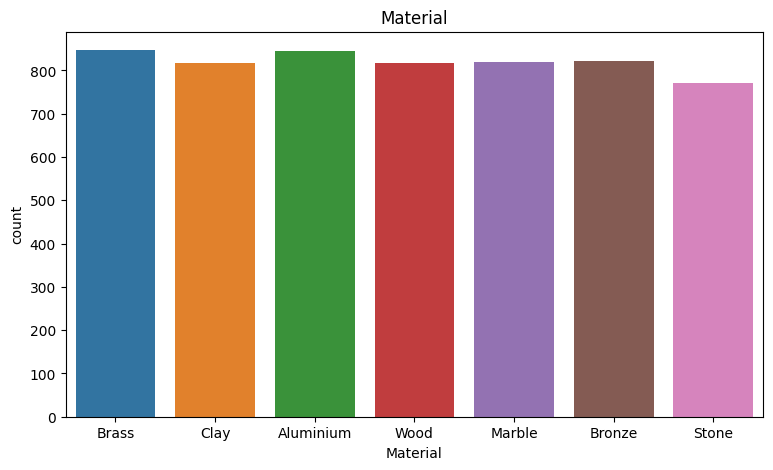

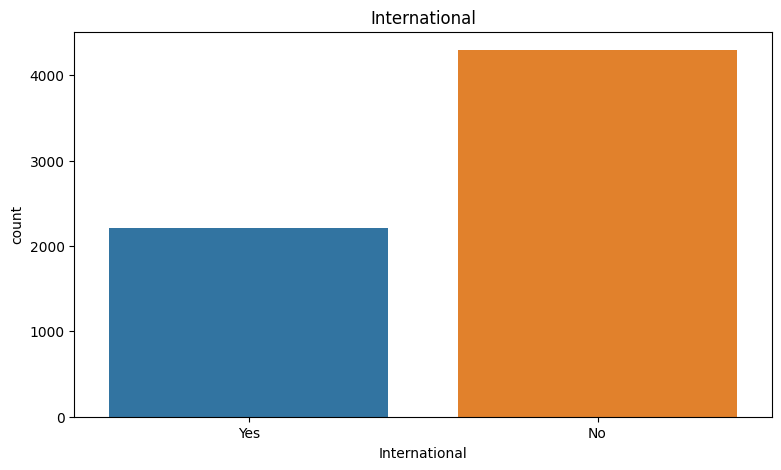

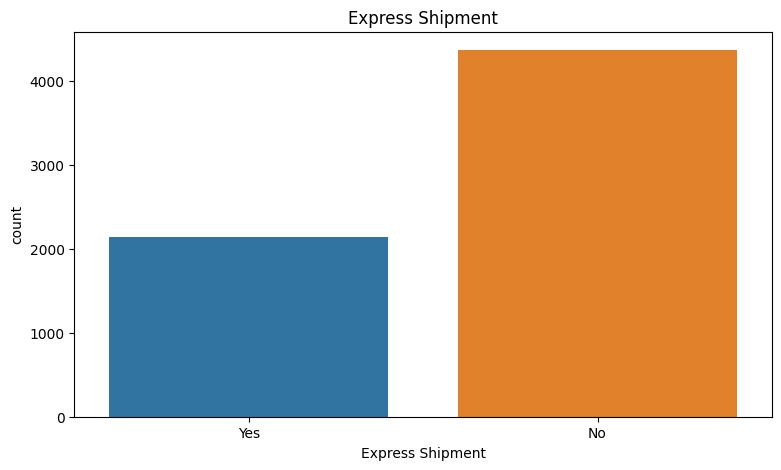

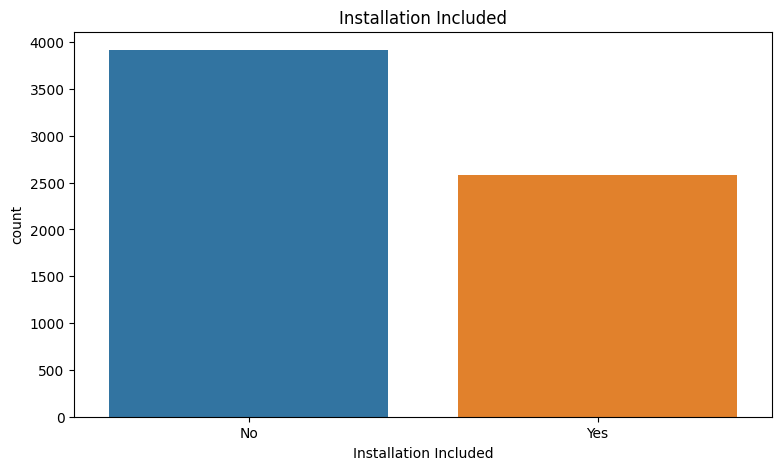

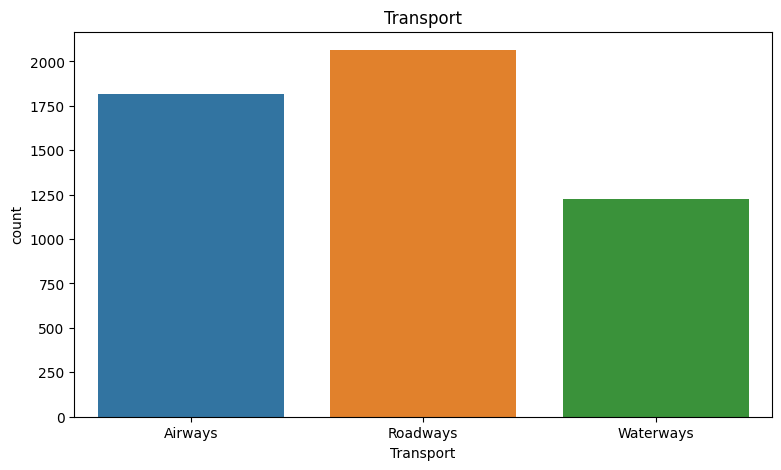

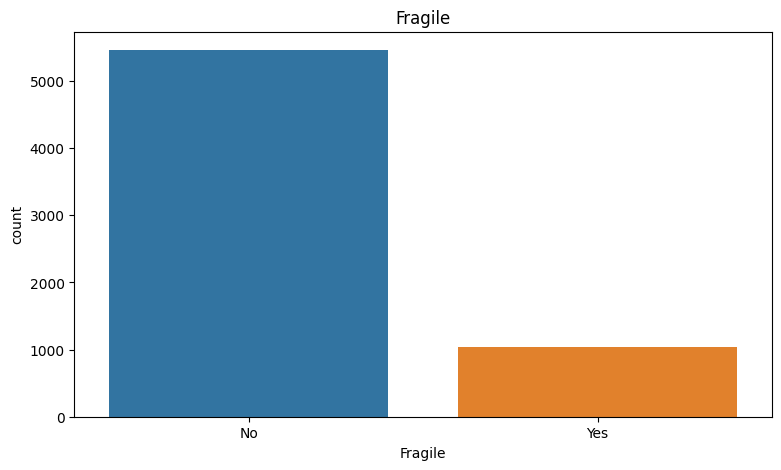

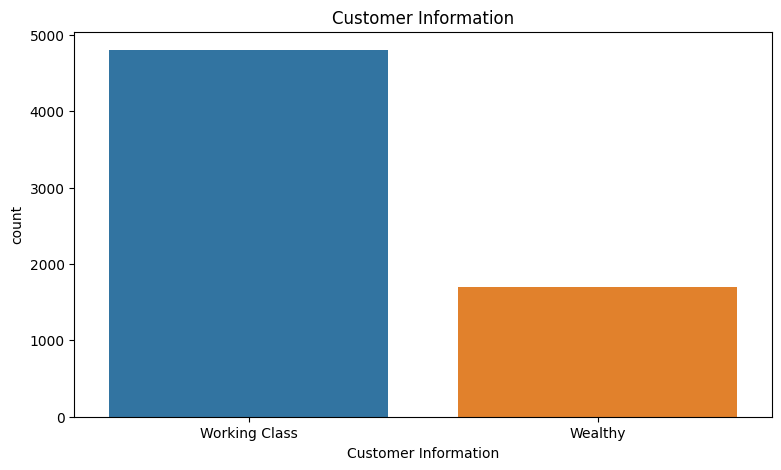

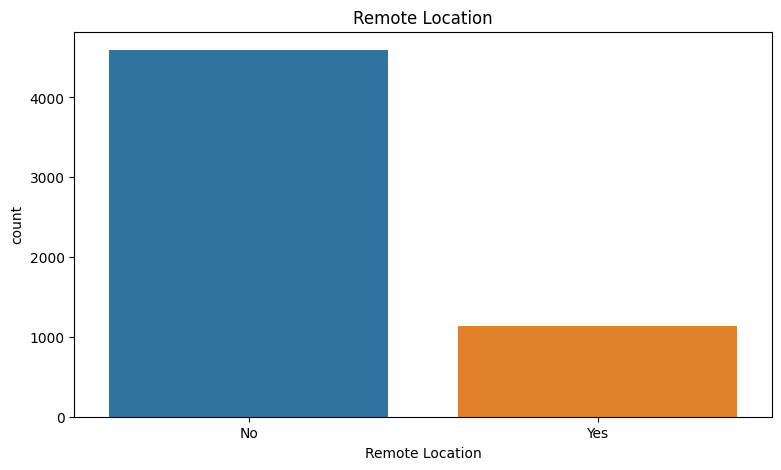

In [15]:
for col in categorical_features:
    if col not in cols_not_considered:
        plt.figure(figsize=(9,5))
        sns.countplot(data=df, x=col)
        plt.title(col)
        plt.show()
        print()

### Observations:

- The Material column is equally distributed.
- The other columns are bi variate.

### MULTIVARIATE ANALYSIS:

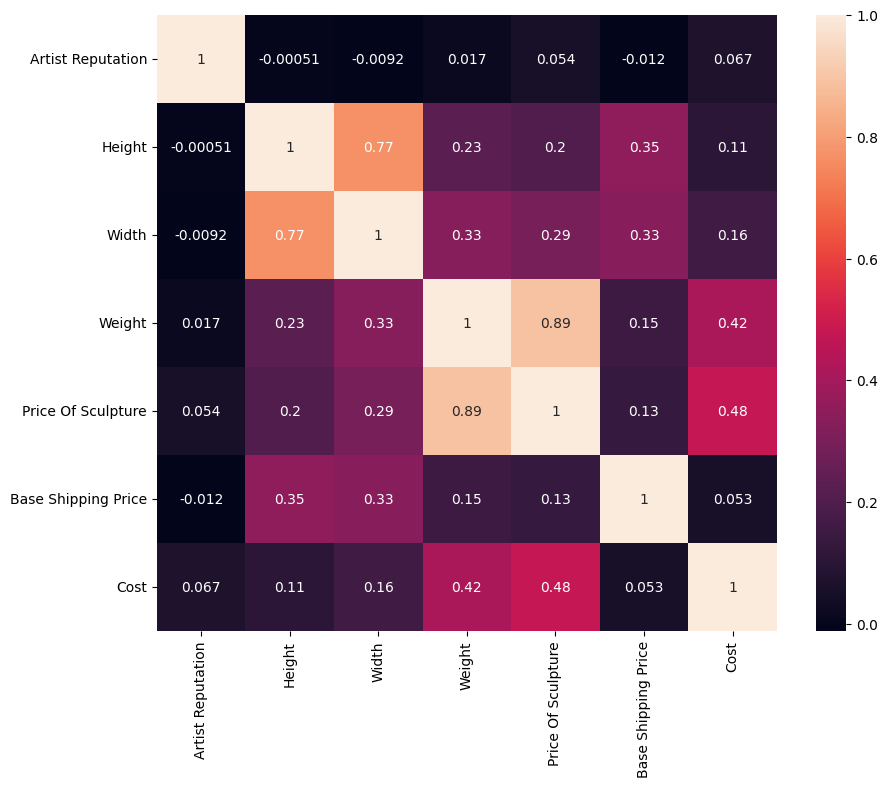

In [16]:
# Plotting the Correlation Heatmap:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Observation:

### Observation:

- There seems to be a positive relationship between the cost and the price of sculpture although it is limited.
- There is also some positive relationship between cost and weight of the artifact.
- There are positive relationships between the Width-Height and Price of Sculpture-Weight variables as well.

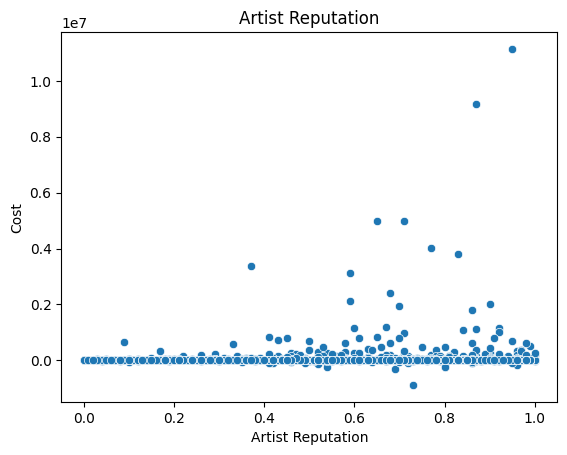

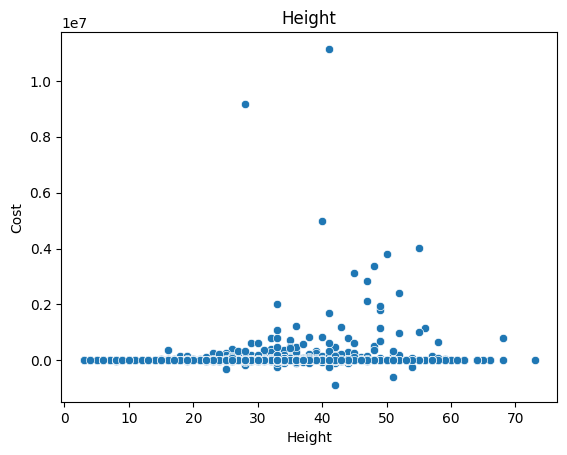

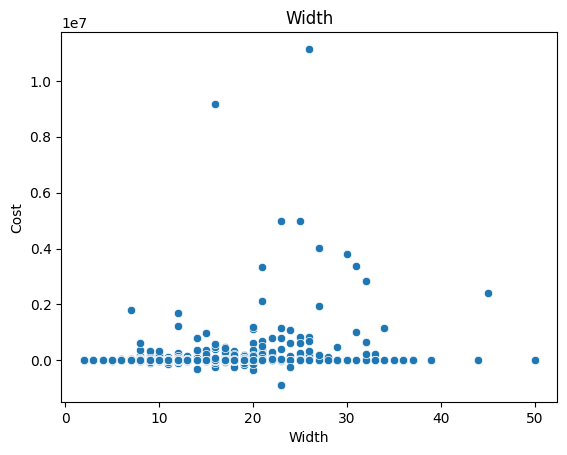

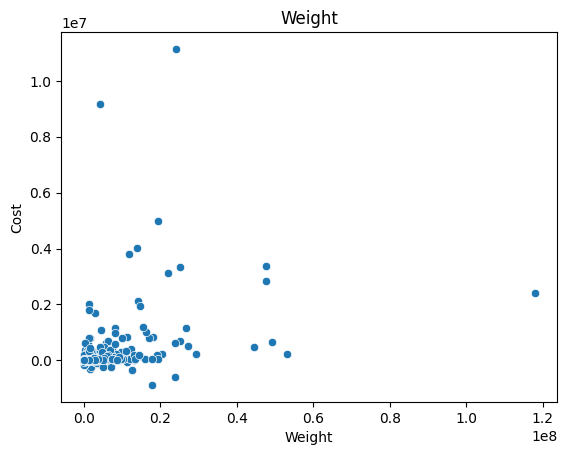

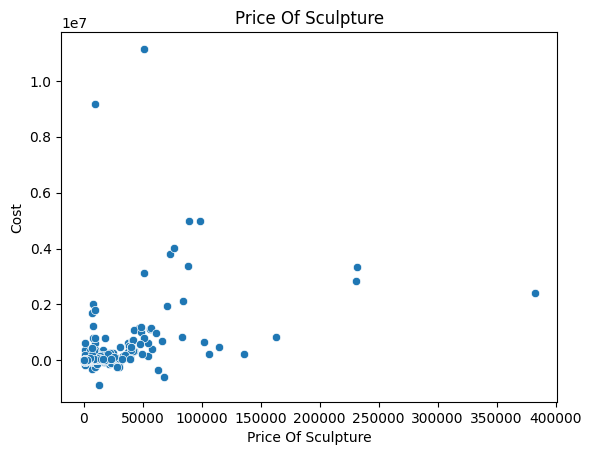

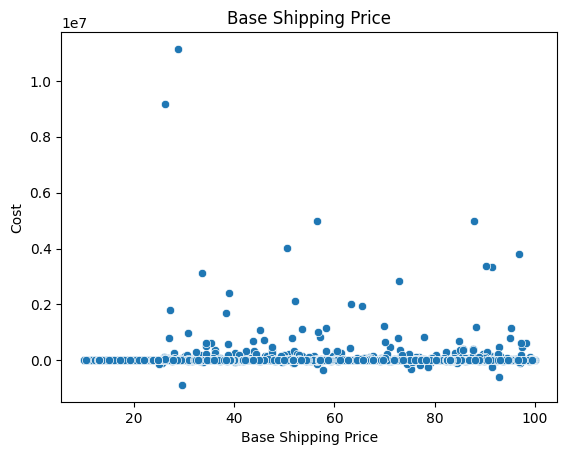

In [17]:
# Checking the relationship between the target column and rest of the numeric columns:

for col in numeric_features:
    if col != 'Cost':
        sns.scatterplot(data=df, x = col, y = target_feature)
        plt.title(col)
        plt.show()

### Observations:

- There is no out and out linear relationship between 'Cost' and the other columns, except for maybe 'Price of Sculpture' column.
- We can say, that there is a non linear relationship between the target feature and the independent features.
- Hence, we shall be using non-linear regression methods for creating our model such as RandomForest, XG Boost etc.

#### Checking whether the cost differs among the categories of the categorical variables:

<AxesSubplot:xlabel='International', ylabel='Cost'>

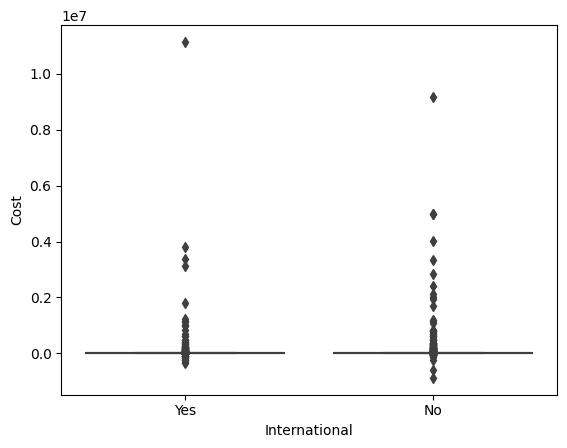

In [22]:
# International and Cost variable:

sns.boxplot(data=df, x='International', y = 'Cost')

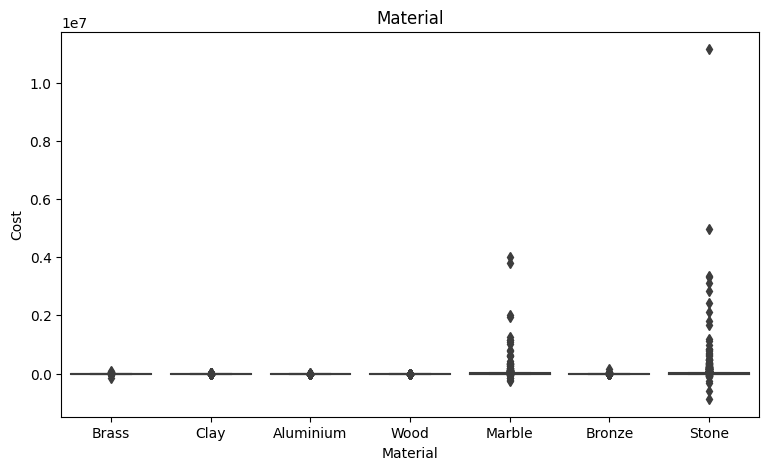

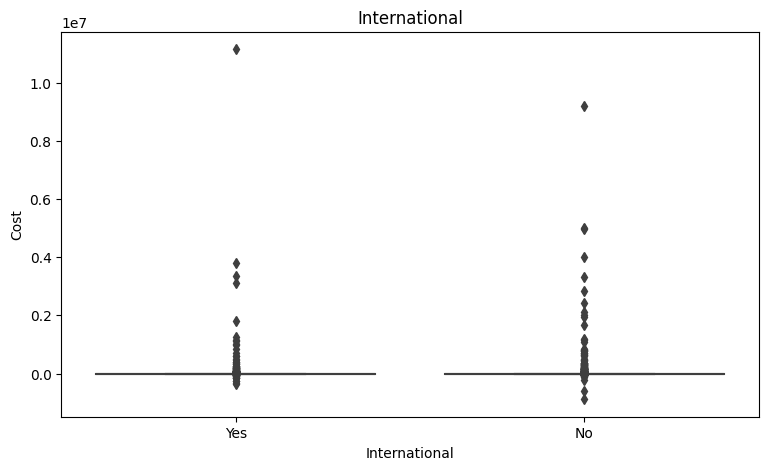

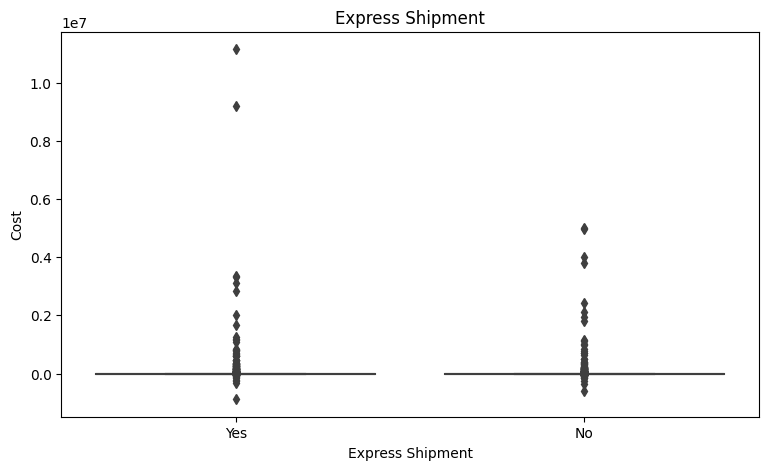

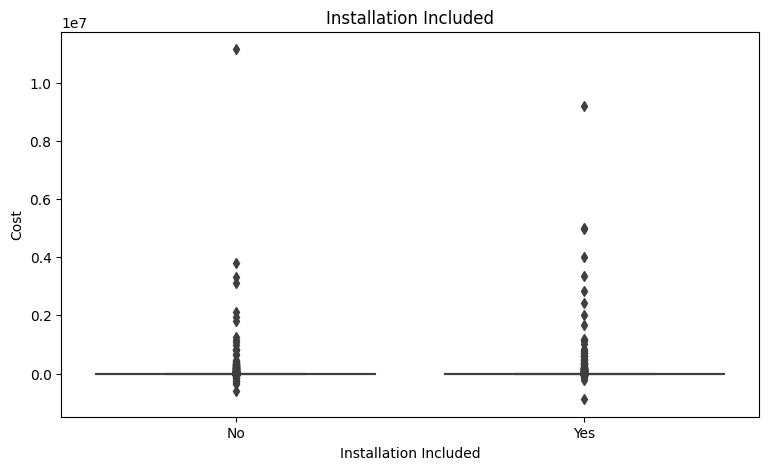

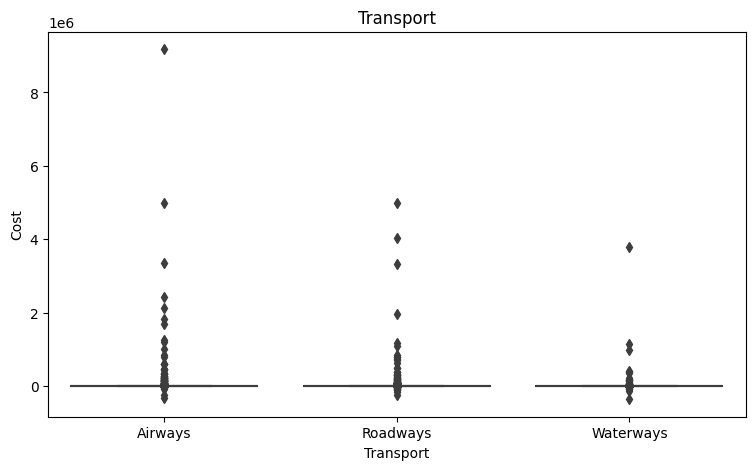

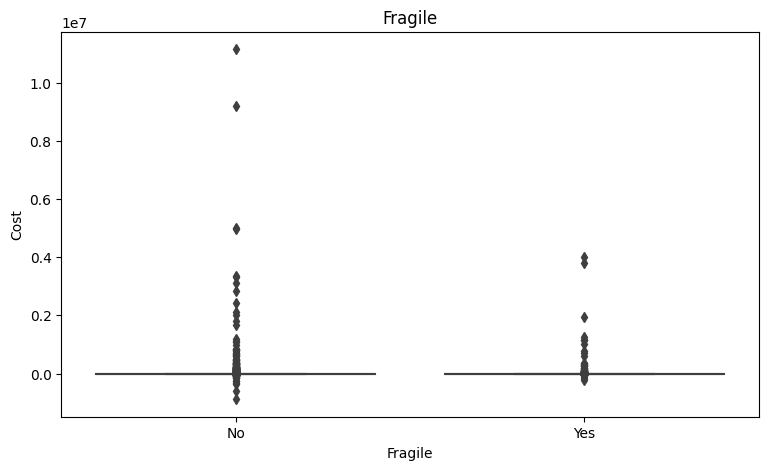

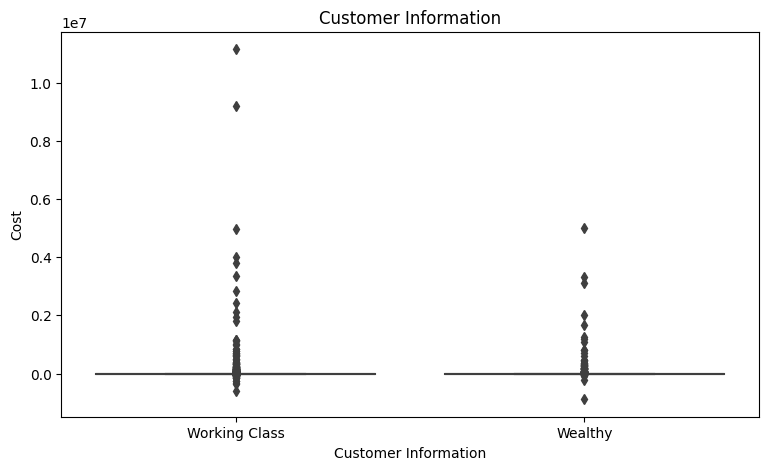

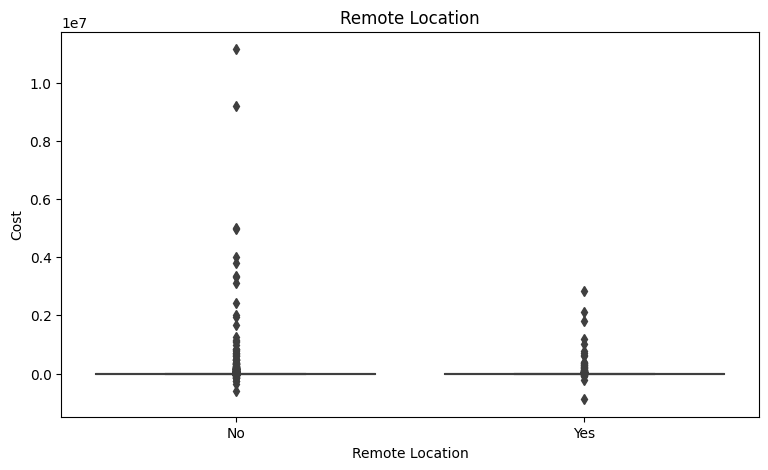

In [23]:
for col in categorical_features:
    if col not in cols_not_considered:
        plt.figure(figsize=(9,5))
        sns.boxplot(data=df, x=col, y='Cost')
        plt.title(col)
        plt.show()
        print()

### Observation:
- After observing the plots we can infer that there is no significant predictable relationship between the categorical variables and Cost.

In [24]:
# Checking the date columns:

# Here we shall check, if there are any cost differences or patterns when the costs are high, example in a year OR specific month
# of the year.

# Also, we shall check either the scheduled date or the delivery date columns as there is not much difference between the two.

# changing the object datetime columns to datetime datetime columns:

df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


In [25]:
df['scheduled_year'] = pd.DatetimeIndex(df['Scheduled Date']).year
df['scheduled_month'] = pd.DatetimeIndex(df['Scheduled Date']).month

In [26]:
df.head()

# we have successfully extracted the year and month.

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,scheduled_year,scheduled_month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12


In [28]:
# Now that we have separated the year and month for the schedule date, lets check the mean cost every month for each year.

x = df.groupby(["scheduled_year", "scheduled_month"])["Cost"].mean()


In [30]:
# the above cell gives us a view of the table, which is not easy to view.
# transposing the table for a better view.

df_wide = x.unstack().T
df_wide.head()

scheduled_year,2015,2016,2017,2018,2019
scheduled_month,,,,,
1,1243.620800,12930.272703,13388.419779,47457.768519,2430.550495
2,34249.351818,10034.132545,3427.163673,6612.238687,3840.484630
3,23775.741185,10757.195810,41359.835804,20026.385455,2265.834019
4,94668.648276,4288.732696,26634.491452,4138.730309,8374.422975
5,15884.313833,4103.283514,8857.153077,17461.434118,14129.902741


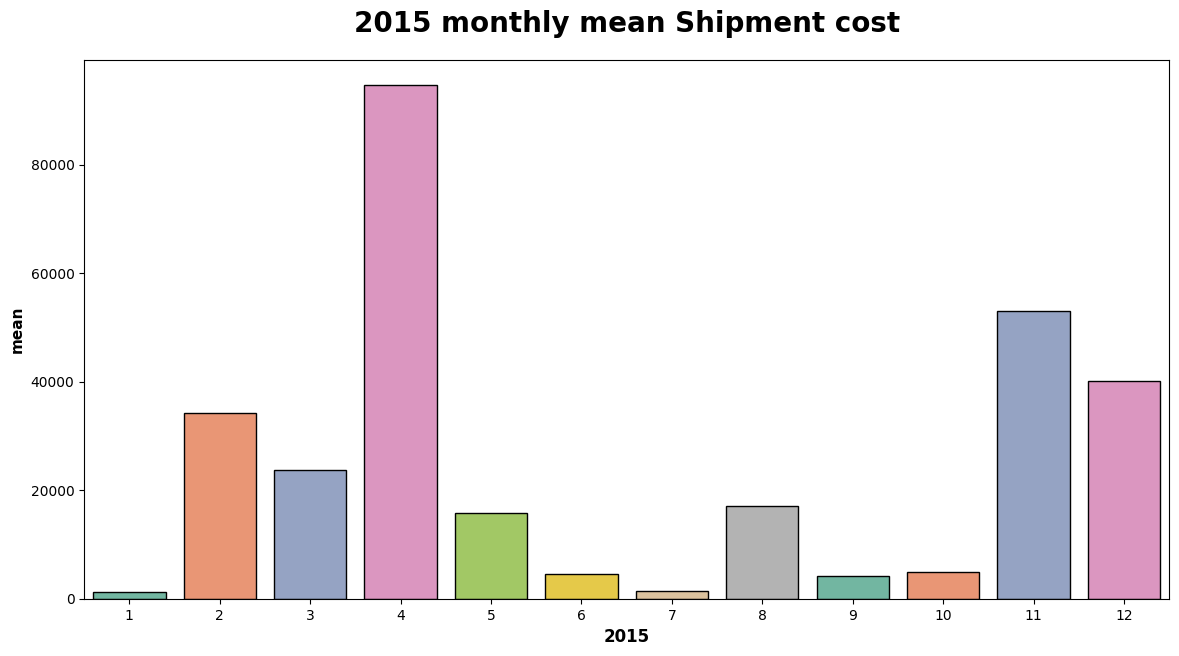

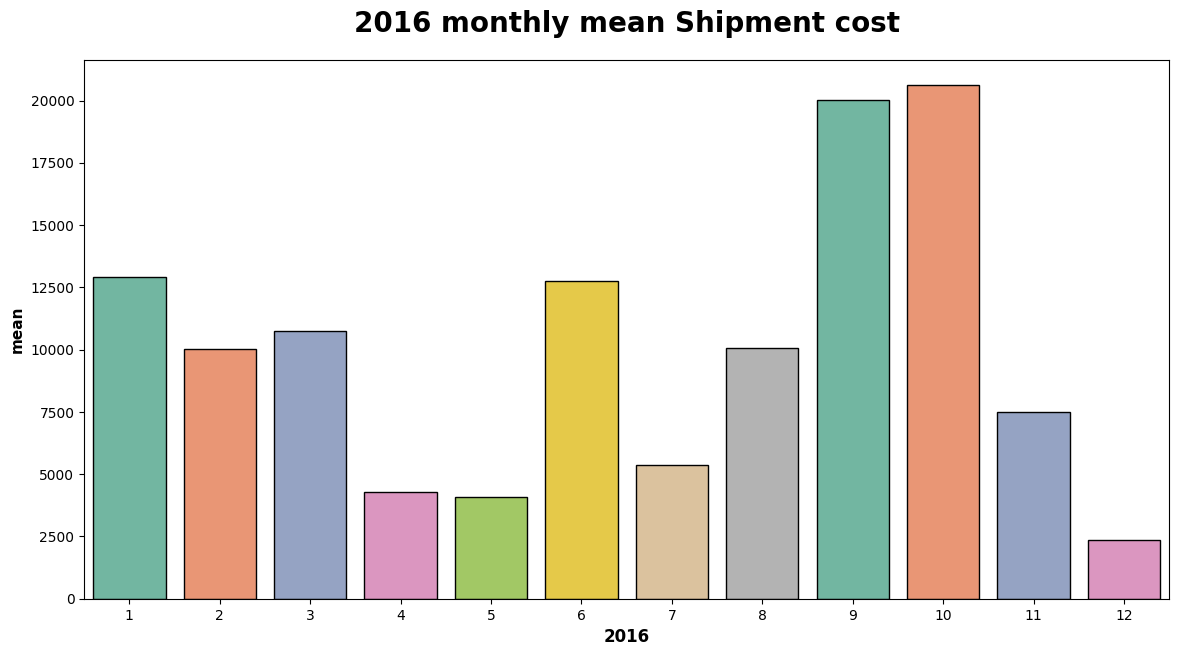

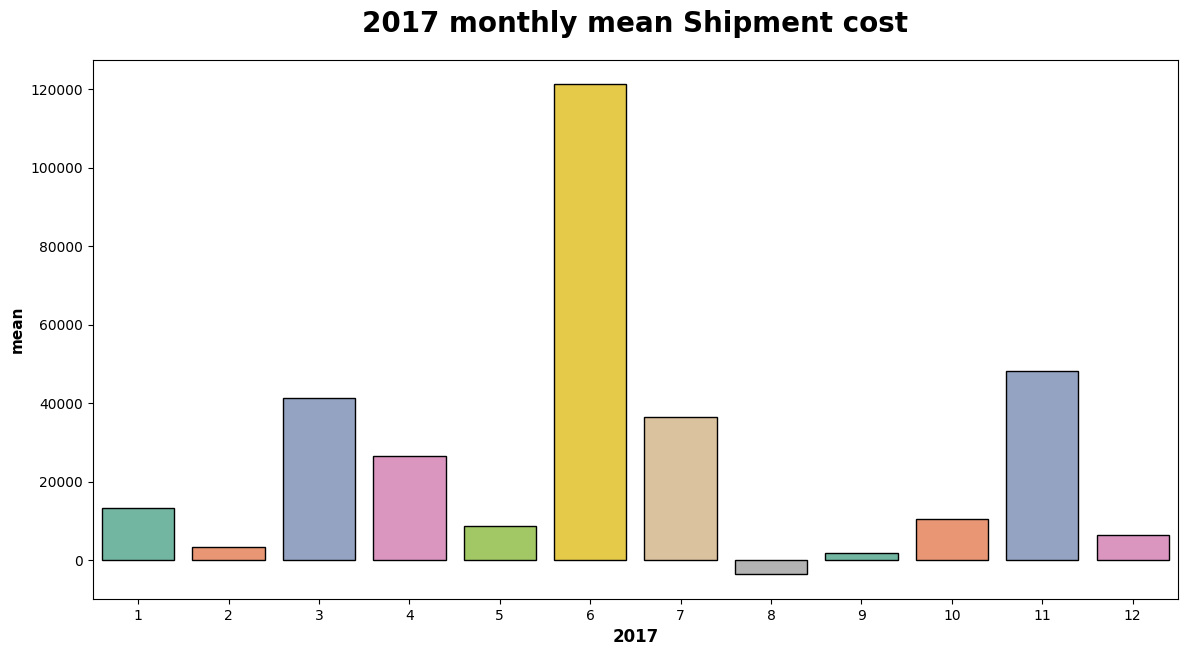

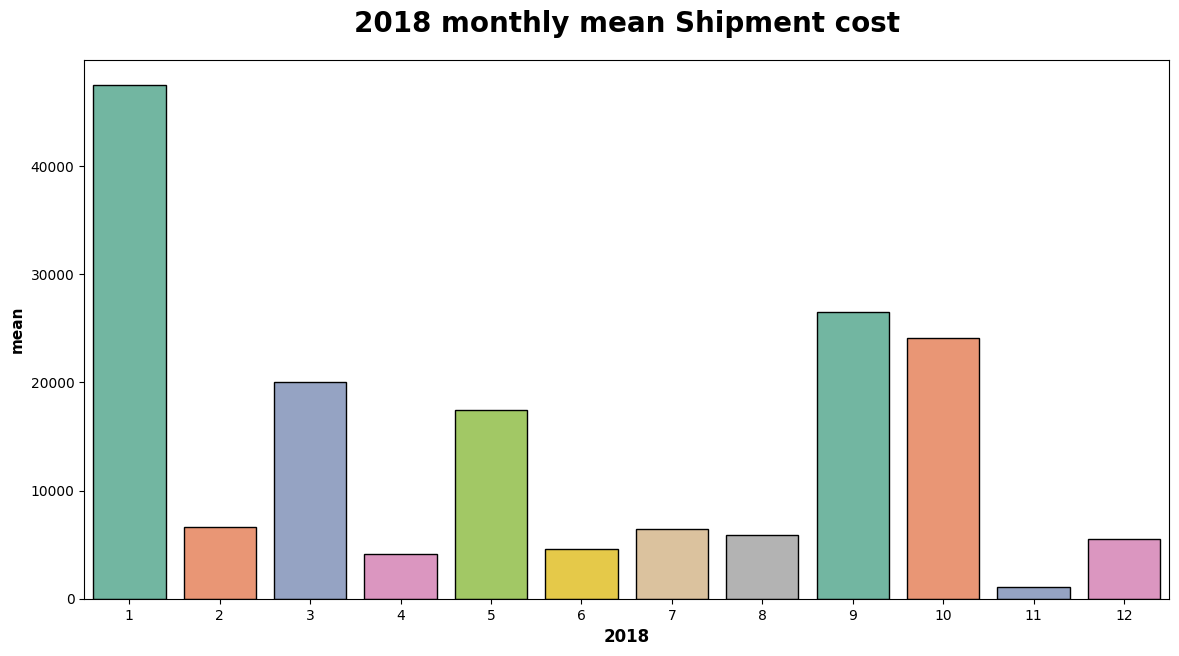

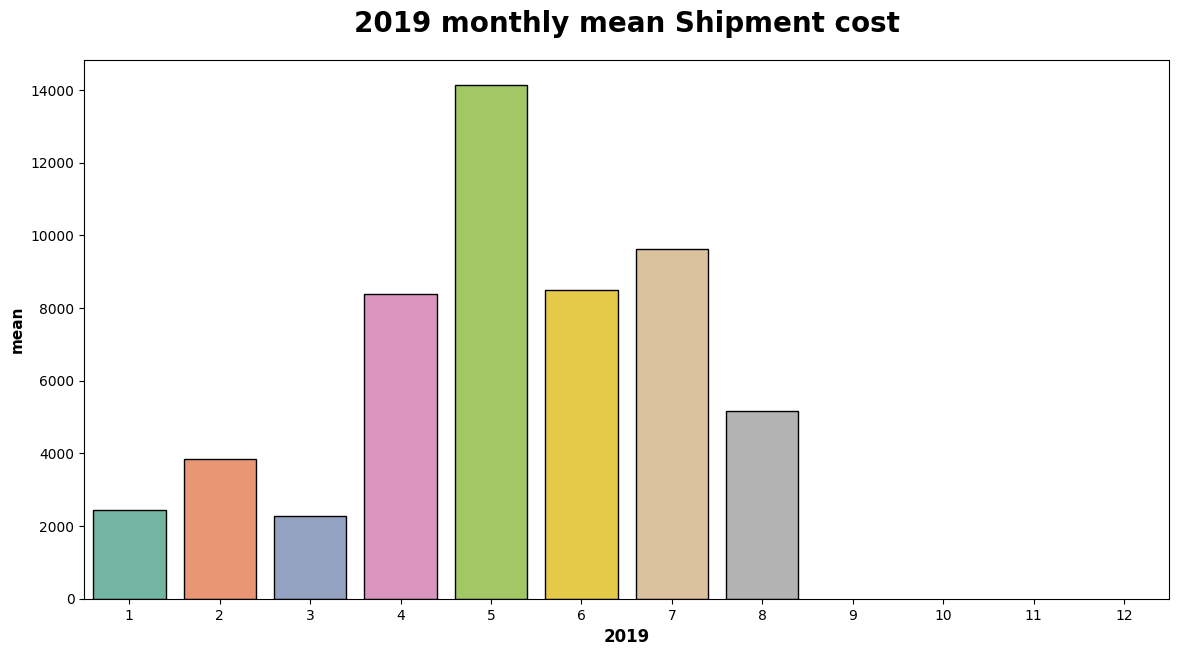

In [31]:
for year in df_wide.columns:
    plt.subplots(figsize=(14,7))
    sns.barplot(y=df_wide[year],x=df_wide.index,ec = "black", palette="Set2")
    plt.title(str(year) + " monthly mean Shipment cost", weight="bold",fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(year, weight="bold", fontsize=12)
    plt.show()

### Observations based on Data Analysis:

- The data is a mixture of continuous and categorical variable.
- Of the Continuous variables, weight and price of sculpture affect the Cost of shipping.
- Of the Categorical variables, we can observe that not many or no variable significantly affects the Cost.
- If we consider the dates, there are not predictable patterns either yearwise or monthwise wrt the Cost.
- Feature Engineering needs to be done for the date variable as well as the continuous variables.
- Also, there are a lot of null values, we shall perform the null value imputation as well.
- The problem is a non linear regression problem, where we shall use regression techniques such as Random Forest, XGBoost, CatBoost etc. 